# Final Project Submission

Please fill out:
* Student name: Joseph Husney
* Student pace: full time
* Scheduled project review date/time: 8/06/2020 5:00 pm
* Instructor name: James Irving
* Blog post URL: https://jhusney1.github.io/reasons_to_use_webscraping_over_apis

## Introduction
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry.
Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.
We will analyze our findings through three visuals. Hopefully, this will shed some light on which kinds of movies microsoft should invest in.

## Retrieve Data

### Import necessary modules

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from tqdm import tqdm

In [2]:
#Allowing pandas to display unlimited info
# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 1000)

### Importing dataframe
Before analyzing the data, it must first be retrieved. Inside the package given to us, there is a file that has all the movie info. We will use this info to get all kinds of details which we can further analyze. We will put this into a pandas dataframe so we can utilize all the tools pandas has to offer

In [3]:
# Load csv file to dataframe
df = pd.read_csv('zippedData/tmdb_5000_movies.csv')

In [4]:
# Preview data
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
# See how long dataframe is
df.shape

(4803, 20)

## Data Cleaning
Upon inspecting the data, it became clear that there are many movies missing certain important data points. For instance, some movies don't have genre data. Others have a budget and/or revenue of zero. Here we will clean up the data by deleting those rows from the dataframe.

### Get rid of rows without genre data

In [6]:
# See if there are any null values for genre
df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [7]:
# No null values - this code isn't necessary for now
# df = df[~df['genres'].isna()]

### Get rid of rows with budget or revenue of zero

In [8]:
# Find out how many rows we are dropping
indexNames1 = df[ df['budget'] == 0 ].index
indexNames2 = df[ df['revenue'] == 0 ].index
len(indexNames1), len(indexNames2)

(1037, 1427)

In [9]:
# Drop rows
indexNames = df[ df['budget'] == 0 ].index
df.drop(indexNames , inplace=True)


indexNames = df[ df['revenue'] == 0 ].index
df.drop(indexNames , inplace=True)

In [10]:
# See shape after dropping all those rows
df.shape

(3229, 20)

## Now we will discuss three questions that will shed some light on which movies microsoft should invest in

### Question 1: What is the *domestic* average movie profit categorized by genre?

In [11]:
# Check type of genre column in order to manipulate data
type(df['genres'][0])

str

In [12]:
# Convert to list of dictionaries that it originally was.
import ast
df['genres'] = df['genres'].map(ast.literal_eval)

In [13]:
type(df['genres'][0][0])

dict

In [14]:
def seperate_genres(genre_list):
    genres = []
    for genre in genre_list:
            genres.append(genre['name'])
    return genres

In [15]:
# Make separate column for genres as a list of genre names
df['genre'] = df['genres'].map(seperate_genres)

In [16]:
genre_df = df.explode('genre')

In [17]:
genre_df['profit'] = genre_df['revenue'] - genre_df['budget']

In [18]:
genre_df[['title','budget','revenue', 'profit']].head()

,title,budget,revenue,profit
0,Avatar,237000000,2787965087,2550965087
0,Avatar,237000000,2787965087,2550965087
0,Avatar,237000000,2787965087,2550965087
0,Avatar,237000000,2787965087,2550965087
1,Pirates of the Caribbean: At World's End,300000000,961000000,661000000


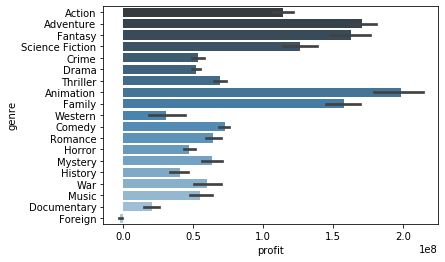

In [19]:
sns.barplot(y= 'genre', x='profit', data=genre_df, ci=68,palette="Blues_d")

#### Conclusion: The 5 most profitable genres are Animation, Adventure, Fantasy, Family, and Science Fiction. We recommend that microsoft invest in animated movies.

### Question 2: Is there an optimal runtime (in terms of profit) for movies domestically. If so, what is it? 

In [20]:
df_runtime = df.copy()

In [21]:
df_runtime['profit'] = df_runtime['revenue'] - df_runtime['budget']
df_runtime['profit_margin'] = (df_runtime['profit'] / df_runtime['budget'])*100

In [22]:
df_runtime['runtime']

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4773     92.0
4788     93.0
4792    111.0
4796     77.0
4798     81.0
Name: runtime, Length: 3229, dtype: float64

In [23]:
# slice out 50 most profitable movies to look at
df_runtime = df_runtime.sort_values('profit',ascending=False).head(50)

In [24]:
df_runtime[['title', 'profit', 'runtime']]

,title,profit,runtime
0,Avatar,2550965087,162.0
25,Titanic,1645034188,194.0
28,Jurassic World,1363528810,124.0
44,Furious 7,1316249360,137.0
16,The Avengers,1299557910,143.0
7,Avengers: Age of Ultron,1125403694,141.0
124,Frozen,1124219009,102.0
546,Minions,1082730962,91.0
329,The Lord of the Rings: The Return of the King,1024888979,201.0
31,Iron Man 3,1015439994,130.0


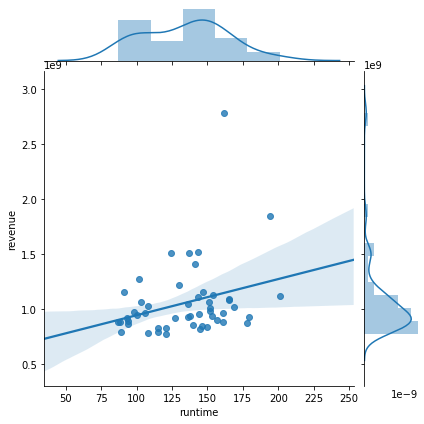

In [25]:
sns.jointplot("runtime", "revenue", data=df_runtime, kind="reg")

#### Conclusion: As illustrated in this plot, there is a small  positive correlation between lengthy movies and how profitable they are. One thing to take note of is that out of the 50 most profitable movies, a big portion of them were around 100 minutes long or around 125-150 minutes long (as illustrated by the bars above the plot). Clearly, they are doing something right. Therefore, microsoft should make movies that are between 125 and 150 minutes long to mimic the most profitable movies.

### Question 3: Which production company(s) are most successful in terms of domestic profit and therefore should be used?

In [26]:
# Ensure that our original dataset is unchanged
print(df.shape)
df.head()

(3229, 21)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]"


### Find out about production company column (type, etc)

In [27]:
type(df['production_companies'][0][0])

str

In [28]:
# Convert to list of dicts
df['production_companies'] = df['production_companies'].map(ast.literal_eval)

In [29]:
type(df['production_companies'][0][0])

dict

In [30]:
list_of_dicts = df['production_companies'][0]

In [31]:
list_of_dicts

[{'name': 'Ingenious Film Partners', 'id': 289},
 {'name': 'Twentieth Century Fox Film Corporation', 'id': 306},
 {'name': 'Dune Entertainment', 'id': 444},
 {'name': 'Lightstorm Entertainment', 'id': 574}]

In [32]:
def seperate_production_companies(company_list):
    company_names = []
    for dict_ in company_list:
        company_names.append(dict_['name'])
    return company_names

In [33]:
df['production_companies'] = df['production_companies'].map(seperate_production_companies)

In [34]:
df['production_companies']

0       [Ingenious Film Partners, Twentieth Century Fo...
1       [Walt Disney Pictures, Jerry Bruckheimer Films...
2                        [Columbia Pictures, Danjaq, B24]
3       [Legendary Pictures, Warner Bros., DC Entertai...
4                                  [Walt Disney Pictures]
                              ...                        
4773              [Miramax Films, View Askew Productions]
4788                              [Dreamland Productions]
4792                                      [Daiei Studios]
4796                                          [Thinkfilm]
4798                                  [Columbia Pictures]
Name: production_companies, Length: 3229, dtype: object

In [35]:
production_company_df = df.explode('production_companies')

In [36]:
production_company_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Twentieth Century Fox Film Corporation,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Dune Entertainment,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Lightstorm Entertainment,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures,...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{'id': 35, 'name': 'Comedy'}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,View Askew Productions,...,1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,[Comedy]
4788,12000,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",NaN,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,Dreamland Productions,...,1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110,"[Horror, Comedy, Crime]"
4792,20000,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,Daiei Studios,...,1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Madness. Terror. Murder.,Cure,7.4,63,"[Crime, Horror, Mystery, Thriller]"
4796,7000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.primermovie.com,14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,Friends/fledgling entre

In [37]:
production_company_df['production_companies'].value_counts()

Warner Bros.                              280
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
                                         ... 
Filmtribe                                   1
Seven Arts                                  1
Geisler-Roberdeau                           1
Lago Film                                   1
Novo RPI                                    1
Name: production_companies, Length: 3564, dtype: int64

In [38]:
# Filter to 50 most profitable movies
production_company_df = production_company_df[production_company_df.groupby('production_companies')['production_companies'].transform('count').ge(30)]

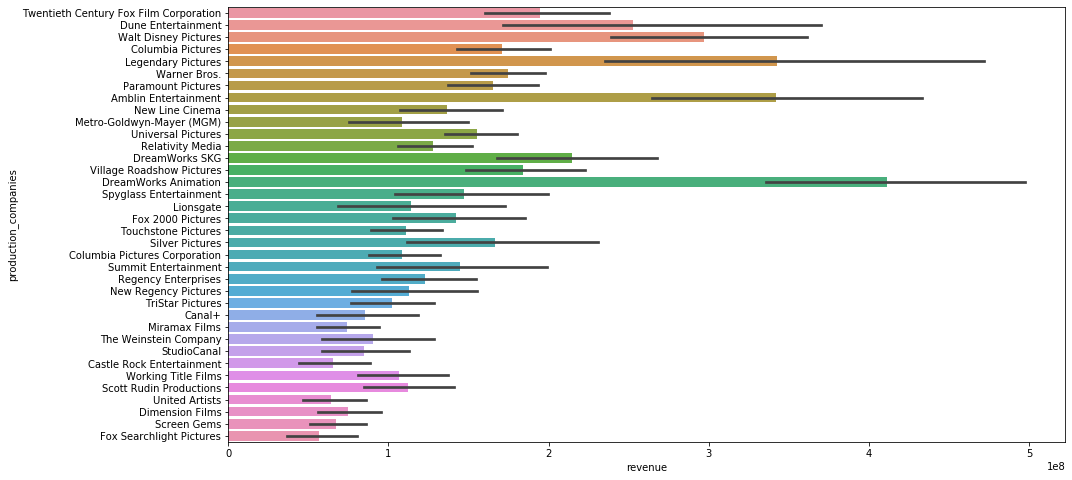

In [39]:
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "revenue", y = "production_companies", ax=ax, data=production_company_df)

#### Conclusion: The top production companies in terms of revenue are DreamWorks animation, Lengendary Pictures, Amblin Entertainment, Walt Disney Pictures, and Dune entertainment. Therefore, microsoft should consider consulting with these companies to help them produce their movies

## Final Conclusion
Bottom line, it's a risky business to get involved with something new without any experience. Microsoft did what they can by getting the data they needed to see how to get started with the movie business

Some questions that have been cleared up for them are as follows:
Question 1: What is the domestic average movie profit categorized by genre?
Question 2: Is there an optimal runtime (in terms of profit) for movies domestically. If so, what is it?
Question 3: Which production company(s) are most successful in terms of domestic profit and therefore should be used?

After analyzing the data, it seems clear that microsoft should make animated movies around 150 minutes long using Dreamworks Animation as their production company.

Although microsoft now has a better idea about which movies are most profitable, there are many other ideas that can be researched to further their investigation to get a clearer picture. One idea would be to analyze the MPAA ratings and see if there is a correlation between certain ratings and the profit. Another idea would be to see if it's worthwhile to hire certain actors and actresses to gain popularity and in turn, profit. These are just some ideas that I plan to get my hands with in the future.